# In Class Notebook, Week 05

You can click on the GitHub URL of this notebook to access the file in near-real time: https://github.com/UIUC-iSchool-DataViz/is445_bcubcg_fall2024/blob/master/week05/inClass_week05.ipynb 

Or you can copy-paste into the nbviewer interface for a plain-text rendering:

https://kokes.github.io/nbviewer.js/viewer.html

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
buildings = pd.read_csv('https://github.com/UIUC-iSchool-DataViz/is445_data/raw/main/building_inventory.csv',
                       na_values={'Square Footage':0,
                                  'Year Acquired':0,
                                  'Year Constructed':0})

In [5]:
#buildings.head()

In [6]:
stats = buildings.groupby('Year Acquired')['Square Footage'].describe()
stats

count           mean           std       min       25%  \
Year Acquired                                                           
1753.0           1.0    1200.000000           NaN    1200.0    1200.0   
1802.0           2.0    2220.000000   1943.129435     846.0    1533.0   
1810.0           3.0    1344.333333   1809.945948     216.0     300.5   
1832.0           1.0  120000.000000           NaN  120000.0  120000.0   
1837.0           1.0   10302.000000           NaN   10302.0   10302.0   
...              ...            ...           ...       ...       ...   
2015.0          20.0   15254.650000  29153.085290     144.0     696.0   
2016.0          10.0   30483.900000  61864.180491    1152.0    2464.0   
2017.0           1.0    6720.000000           NaN    6720.0    6720.0   
2018.0           4.0    4290.000000   5153.644342    1455.0    1455.0   
2019.0           2.0     760.000000      0.000000     760.0     760.0   

                    50%        75%       max  
Year Acquired                                 
1753.0           1200.0    1200.00    1200.0  
1802.0           2220.0    2907.00    3594.0  
1810.0            385.0    1908.50    3432.0  
1832.0         120000.0  120000.00  120000.0  
1837.0          10302.0   10302.00   10302.0  
...                 ...        ...       ...  
2015.0           3152.0   10590.25  105000.0  
2016.0           3352.5    3793.00  184000.0  
2017.0           6720.0    6720.00    6720.0  
2018.0           1852.5    4687.50   12000.0  
2019.0            760.0     760.00     760.0  

[171 rows x 8 columns]

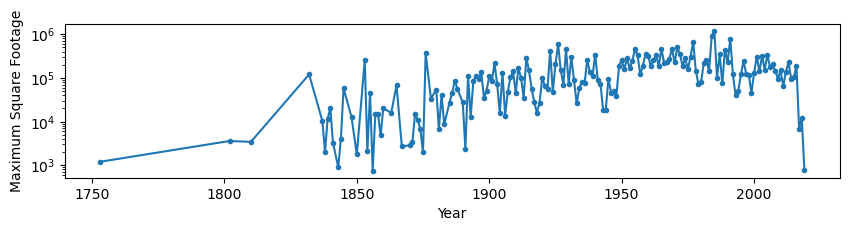

In [10]:
fig, ax = plt.subplots(figsize=(10,2))
ax.plot(stats['max'], marker='.')
ax.set_xlabel('Year')
ax.set_ylabel('Maximum Square Footage')
ax.set_yscale('log')
plt.show()

In [9]:
stats['max'].min(), stats['max'].max()

(750.0, 1200000.0)

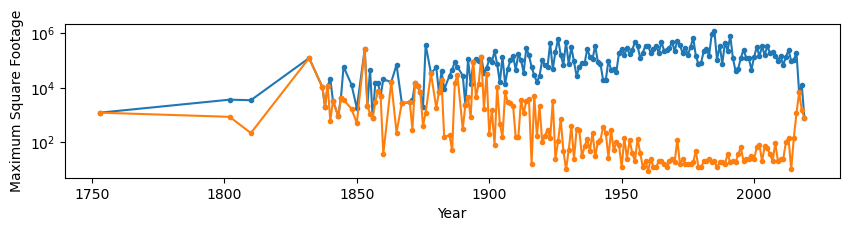

In [11]:
fig, ax = plt.subplots(figsize=(10,2))
ax.plot(stats['max'], marker='.')
ax.plot(stats['min'], marker='.')
ax.set_xlabel('Year')
ax.set_ylabel('Maximum Square Footage')
ax.set_yscale('log')
plt.show()

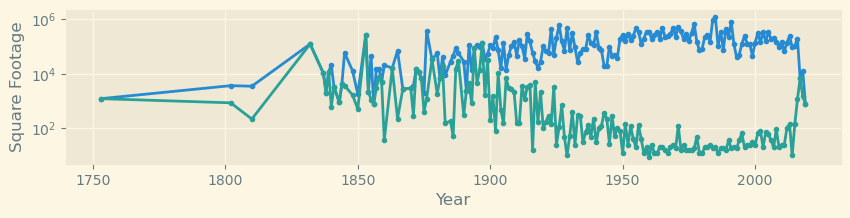

In [15]:
with plt.style.context('Solarize_Light2'):
    # CMD + ]
    fig, ax = plt.subplots(figsize=(10,2))
    ax.plot(stats['max'], marker='.')
    ax.plot(stats['min'], marker='.')
    ax.set_xlabel('Year')
    ax.set_ylabel('Square Footage')
    ax.set_yscale('log')
    plt.show()

In [14]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [16]:
import ipywidgets

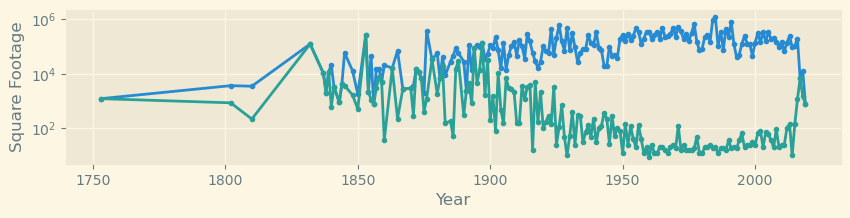

In [17]:
style = 'Solarize_Light2'

with plt.style.context(style):
    # CMD + ]
    fig, ax = plt.subplots(figsize=(10,2))
    ax.plot(stats['max'], marker='.')
    ax.plot(stats['min'], marker='.')
    ax.set_xlabel('Year')
    ax.set_ylabel('Square Footage')
    ax.set_yscale('log')
    plt.show()

In [19]:
#style = 'Solarize_Light2'
@ipywidgets.interact(style = plt.style.available)
def make_plot(style): # function with my interactive parameter as input
    with plt.style.context(style):
        # CMD + ]
        fig, ax = plt.subplots(figsize=(10,2))
        ax.plot(stats['max'], marker='.')
        ax.plot(stats['min'], marker='.')
        ax.set_xlabel('Year')
        ax.set_ylabel('Square Footage')
        ax.set_yscale('log')
        plt.show()

interactive(children=(Dropdown(description='style', options=('Solarize_Light2', '_classic_test_patch', '_mpl-g…

In [22]:
@ipywidgets.interact(x=10)
def f(x):
    print('my value = ' + str(x))

interactive(children=(IntSlider(value=10, description='x', max=30, min=-10), Output()), _dom_classes=('widget-…

In [21]:
f(5)

my value = 5


## More complex widgets with Michigan dataset

In [23]:
#!wget https://github.com/UIUC-iSchool-DataViz/is445_data/raw/main/michigan_lld.flt

In [24]:
#michigan_file = './michigan_lld.flt' # locally, if I got this with wget command
michigan_file = '/Users/jnaiman/Downloads/michigan_lld.flt'

In [25]:
import numpy as np

In [26]:
michigan = np.fromfile(michigan_file,dtype='f4').reshape(5365,4201)

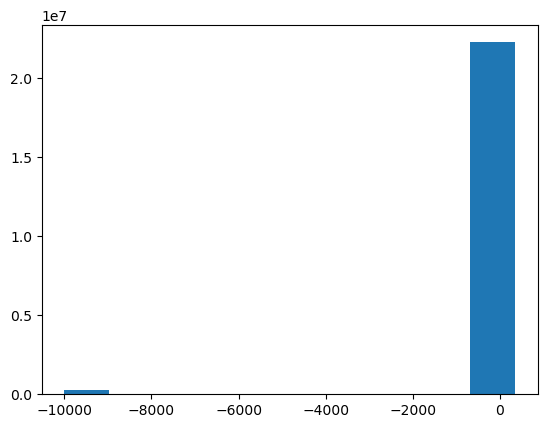

In [27]:
plt.hist(michigan.flatten())
plt.show()

In [28]:
np.min(michigan)

-9999.0

In [29]:
michigan[michigan==-9999] = np.nan

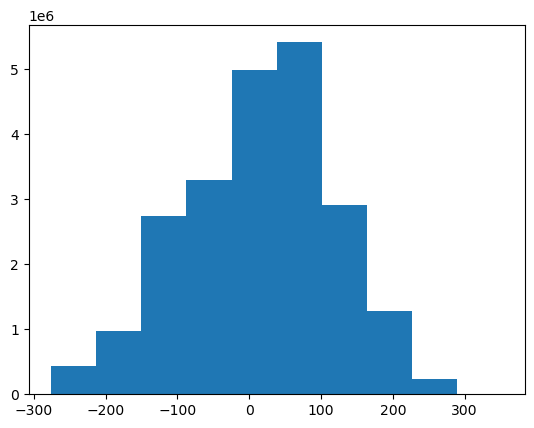

In [31]:
plt.hist(michigan.flatten())
plt.show()

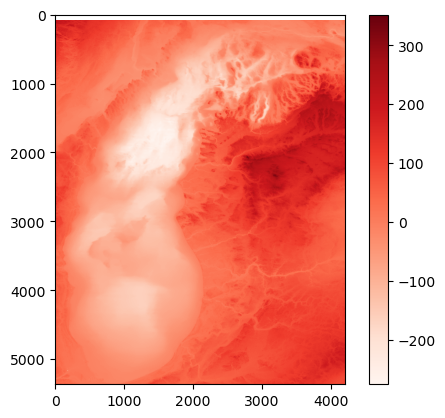

In [32]:
#Step 1 -- make a plot with the value I want to change hard-coded

colormap = 'Reds'

plt.imshow(michigan, cmap=colormap)
plt.colorbar()
plt.show()

In [33]:
# Step 2 -- use this hardcoded value as an input in a function

#colormap = 'Reds'

def make_mich_plot(colormap):
    plt.imshow(michigan, cmap=colormap)
    plt.colorbar()
    plt.show()

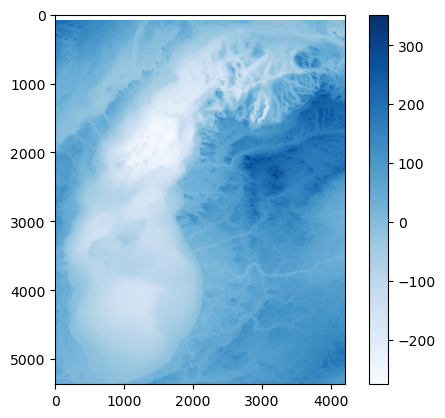

In [35]:
# Step 3 -- "try out" some function values
make_mich_plot('Blues')

In [36]:
plt.colormaps()

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'magma_r',
 'inferno_r',
 'plasma_r',
 'viridis_r',
 'cividis_r',
 'twilight_r',
 'twilight

In [39]:
# Step 4 -- use ipywidgets.interact decorator
@ipywidgets.interact(colormap = plt.colormaps())
def make_mich_plot(colormap):
    plt.imshow(michigan, cmap=colormap)
    plt.clim(-352,352)
    plt.colorbar()
    plt.show()

interactive(children=(Dropdown(description='colormap', options=('magma', 'inferno', 'plasma', 'viridis', 'civi…

In [38]:
np.nanmin(michigan), np.nanmax(michigan)

(-275.89, 351.94348)

Making 2 options for our interactive map:

In [41]:
import matplotlib

In [43]:
matplotlib.colors.SymLogNorm?

Init signature:
matplotlib.colors.SymLogNorm(
    linthresh,
    linscale=1.0,
    vmin=None,
    vmax=None,
    clip=False,
    *,
    base=10,
)
Docstring:     
The symmetrical logarithmic scale is logarithmic in both the
positive and negative directions from the origin.

Since the values close to zero tend toward infinity, there is a
need to have a range around zero that is linear.  The parameter
*linthresh* allows the user to specify the size of this range
(-*linthresh*, *linthresh*).

Parameters
----------
linthresh : float
    The range within which the plot is linear (to avoid having the plot
    go to infinity around zero).
linscale : float, default: 1
    This allows the linear range (-*linthresh* to *linthresh*) to be
    stretched relative to the logarithmic range. Its value is the
    number of decades to use for each half of the linear range. For
    example, when *linscale* == 1.0 (the default), the space used for
    the positive and negative halves of the linear range w

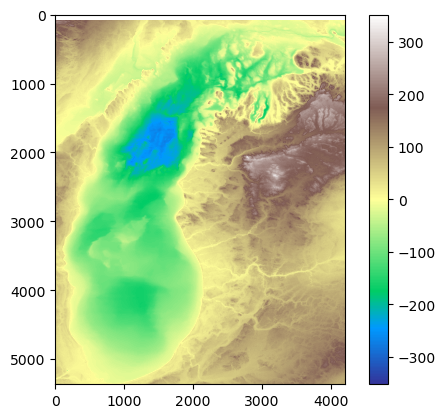

In [45]:
# Step 1: hardcode 2 options
colormap = 'terrain'
take_log = False

if take_log:
    norm = matplotlib.colors.SymLogNorm(10)
else:
    norm = matplotlib.colors.Normalize() # default linear

plt.imshow(michigan, cmap=colormap, norm=norm)
plt.clim(-352,352)
plt.colorbar()
plt.show()

In [46]:
# Step 2 -- make hardcoded values inputs to a function
#colormap = 'terrain'
#take_log = False

def make_mich_plot(colormap, take_log):
    if take_log:
        norm = matplotlib.colors.SymLogNorm(10)
    else:
        norm = matplotlib.colors.Normalize() # default linear
    
    plt.imshow(michigan, cmap=colormap, norm=norm)
    plt.clim(-352,352)
    plt.colorbar()
    plt.show()

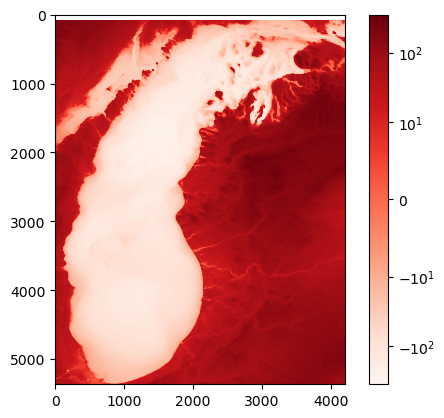

In [49]:
# Step 3 -- check function!
make_mich_plot('Reds', True)

In [50]:
# Step 4 -- use decorator to make function interactive
@ipywidgets.interact(colormap=plt.colormaps(), take_log = True)
def make_mich_plot(colormap, take_log):
    if take_log:
        norm = matplotlib.colors.SymLogNorm(10)
    else:
        norm = matplotlib.colors.Normalize() # default linear
    
    plt.imshow(michigan, cmap=colormap, norm=norm)
    plt.clim(-352,352)
    plt.colorbar()
    plt.show()

interactive(children=(Dropdown(description='colormap', options=('magma', 'inferno', 'plasma', 'viridis', 'civi…

## More specifics with ipywidgets

In [51]:
itext = ipywidgets.IntText()

In [52]:
itext

IntText(value=0)

In [54]:
itext.value

1

In [56]:
ip = ipywidgets.IntProgress(value=80)
ip

IntProgress(value=80)

In [57]:
irange = ipywidgets.IntSlider(min=0, max=100, step=1)
irange

IntSlider(value=0)

In [59]:
ip.keys

['_dom_classes',
 '_model_module',
 '_model_module_version',
 '_model_name',
 '_view_count',
 '_view_module',
 '_view_module_version',
 '_view_name',
 'bar_style',
 'description',
 'description_tooltip',
 'layout',
 'max',
 'min',
 'orientation',
 'style',
 'value']

In [60]:
ip.value

80

In [61]:
irange.keys

['_dom_classes',
 '_model_module',
 '_model_module_version',
 '_model_name',
 '_view_count',
 '_view_module',
 '_view_module_version',
 '_view_name',
 'continuous_update',
 'description',
 'description_tooltip',
 'disabled',
 'layout',
 'max',
 'min',
 'orientation',
 'readout',
 'readout_format',
 'step',
 'style',
 'value']

In [62]:
irange.value

43

In [63]:
ipywidgets.jslink?

Signature: ipywidgets.jslink(attr1, attr2)
Docstring:
Link two widget attributes on the frontend so they remain in sync.

The link is created in the front-end and does not rely on a roundtrip
to the backend.

Parameters
----------
source : a (Widget, 'trait_name') tuple for the first trait
target : a (Widget, 'trait_name') tuple for the second trait

Examples
--------

>>> c = link((widget1, 'value'), (widget2, 'value'))
File:      /opt/anaconda3/envs/DataViz2/lib/python3.10/site-packages/ipywidgets/widgets/widget_link.py
Type:      function

In [64]:
ipywidgets.jslink((ip,'value'), (irange,'value'))

Link(source=(IntProgress(value=80), 'value'), target=(IntSlider(value=43), 'value'))

In [65]:
ip

IntProgress(value=80)

In [66]:
irange

IntSlider(value=80)

In [67]:
ipywidgets.VBox([ip,irange])

In [68]:
ipywidgets.link?

Init signature:
ipywidgets.link(
    source: 't.Any',
    target: 't.Any',
    transform: 't.Any' = None,
) -> 'None'
Docstring:     
Link traits from different objects together so they remain in sync.

Parameters
----------
source : (object / attribute name) pair
target : (object / attribute name) pair
transform: iterable with two callables (optional)
    Data transformation between source and target and target and source.

Examples
--------
>>> class X(HasTraits):
...     value = Int()

>>> src = X(value=1)
>>> tgt = X(value=42)
>>> c = link((src, "value"), (tgt, "value"))

Setting source updates target objects:
>>> src.value = 5
>>> tgt.value
5
File:           /opt/anaconda3/envs/DataViz2/lib/python3.10/site-packages/traitlets/traitlets.py
Type:           type
Subclasses:     

In [69]:
ip2 = ipywidgets.IntProgress(value=90)
irange2 = ipywidgets.IntSlider(min=0,max=100,step=1)
ipywidgets.link((ip2,'value'),(irange2,'value'))
ipywidgets.VBox([ip2,irange2])

In [70]:
button = ipywidgets.Button(description='I am a button.')
button

Button(description='I am a button.', style=ButtonStyle())

In [71]:
def say_click(event): # event?
    print('I have clicked!')

In [72]:
button.on_click(say_click)

In [80]:
button = ipywidgets.Button(description='I am a button')

out = ipywidgets.Output()

def say_click(event):
    with out:
        print("I have clicked!")

button.on_click(say_click)

In [81]:
button # where is output?

Button(description='I am a button', style=ButtonStyle())

In [82]:
ipywidgets.VBox([button,out]) # out is capturing output

In [83]:
islider = ipywidgets.IntSlider(min=0, max=10, step=1, orientation='vertical')

In [84]:
islider

IntSlider(value=0, max=10, orientation='vertical')

In [86]:
islider.style.keys

['_model_module',
 '_model_module_version',
 '_model_name',
 '_view_count',
 '_view_module',
 '_view_module_version',
 '_view_name',
 'description_width',
 'handle_color']

In [87]:
cp = ipywidgets.ColorPicker()

In [88]:
cp

ColorPicker(value='black')

In [89]:
cp.value

'#f5f5f5'

In [90]:
islider.style.handle_color

In [91]:
ipywidgets.jslink( (cp,'value'), (islider.style, 'handle_color'))

Link(source=(ColorPicker(value='#f5f5f5'), 'value'), target=(SliderStyle(), 'handle_color'))

In [92]:
ipywidgets.HBox([cp,islider])